# Reading picoDst trees with uproot

In [1]:
import uproot

Make sure the uproot version is at least 3.4.15

In [2]:
uproot.__version__

'3.4.15'

Read a file and list the contained objects

In [3]:
file = uproot.open('st_physics_19157003_raw_5500010.picoDst.root')
file.allkeys()

[b'PicoDst;1']

In our case it is only one TTree. We can list all of its branches

In [4]:
tree = file['PicoDst']
tree.allkeys()

[b'Event',
 b'Event.mRunId',
 b'Event.mEventId',
 b'Event.mFillId',
 b'Event.mBField',
 b'Event.mTime',
 b'Event.mPrimaryVertexX',
 b'Event.mPrimaryVertexY',
 b'Event.mPrimaryVertexZ',
 b'Event.mPrimaryVertexErrorX',
 b'Event.mPrimaryVertexErrorY',
 b'Event.mPrimaryVertexErrorZ',
 b'Event.mRanking',
 b'Event.mNBEMCMatch',
 b'Event.mNBTOFMatch',
 b'Event.mTriggerIds',
 b'Event.mRefMultFtpcEast',
 b'Event.mRefMultFtpcWest',
 b'Event.mRefMultNeg',
 b'Event.mRefMultPos',
 b'Event.mRefMult2NegEast',
 b'Event.mRefMult2PosEast',
 b'Event.mRefMult2NegWest',
 b'Event.mRefMult2PosWest',
 b'Event.mRefMult3NegEast',
 b'Event.mRefMult3PosEast',
 b'Event.mRefMult3NegWest',
 b'Event.mRefMult3PosWest',
 b'Event.mRefMult4NegEast',
 b'Event.mRefMult4PosEast',
 b'Event.mRefMult4NegWest',
 b'Event.mRefMult4PosWest',
 b'Event.mRefMultHalfNegEast',
 b'Event.mRefMultHalfPosEast',
 b'Event.mRefMultHalfNegWest',
 b'Event.mRefMultHalfPosWest',
 b'Event.mGRefMult',
 b'Event.mNumberOfGlobalTracks',
 b'Event.mbTof

Select some branches to be read from the picoDst TTree

In [5]:
branches = {
    'tpx':    'Track.mGMomentumX',
    'tpy':    'Track.mGMomentumY',
    'tpz':    'Track.mGMomentumZ'
}

In [6]:
import itertools
import re

dimpattern = re.compile(r'\[([1-9]+)\]')

def user_names(branches):
    aliases = []
    for alias, name in branches.items():
        #print(alias)
        indices = list(itertools.product(*[ range(int(dim)) for dim in re.findall(dimpattern, name)]))
        #print( indices )
        if len(indices) > 1:
            aliases.extend([ f'{alias}['+']['.join( [str(i) for i in index] ) + ']' for index in indices])
        else:
            aliases.append(alias)
    return aliases

branch_aliases = user_names(branches)
branch_aliases

['tpx', 'tpy', 'tpz']

In [7]:
df = tree.pandas.df(branches.values())
df.columns = user_names(branches)
df

tpx       tpy       tpz
entry subentry                              
0     0         0.778997 -0.023635 -0.415988
      1        -1.080363 -0.144677  1.147605
      2         0.949162  0.023103  0.512916
      3        -0.280640  0.315162 -0.051557
      4        -0.043034  0.199670  0.196421
      5         0.495205 -0.475960 -0.262335
      6        -0.523744  0.766362  0.913614
      7         0.187725 -0.055492  0.396980
      8         0.122821  0.246278  0.159653
      9        -0.034879 -0.014440  0.007146
      10       -0.034975 -0.015070  0.005285
1     0        -0.374717  0.075718 -0.407601
      1         0.295141 -0.961832 -0.782678
      2        -0.366314  0.305598  0.058344
      3        -0.314593  0.351554 -0.502483
      4        -0.464958 -0.309329 -0.374143
      5        -0.055571 -0.551250  0.126719
      6        -0.222053  0.316172 -0.504376
      7        -0.332326  0.272084 -0.329573
      8        -0.570310  0.168996  0.093746
      9        -0.332493  0.208691 -0.218919
      10        0.238299  0.245666 -0.298754
      11       -0.848539  0.319533 -0.884778
      12        0.521510  0.226712 -0.240532
      13       -0.393796 -0.103672 -0.063929
      14       -0.126343  0.341860 -0.522536
      15        0.893584 -0.638192 -0.329903
      16       -0.007294  0.158373 -0.075910
      17        0.229175 -0.180731 -0.205485
      18       -0.280267 -0.031734  0.006045
...                  ...       ...       ...
1659  282       0.028695  0.137888 -0.000230
      283      -0.075902 -0.374733  0.572796
      284      -0.020806  0.082588 -0.006561
      285      -0.035998 -0.137140  0.003412
      286      -0.019046 -0.050027  0.017401
      287      -0.019650 -0.048479  0.016504
      288       0.862012 -0.049717  1.356055
      289       0.173431  0.198413  0.278280
      290      -0.199507 -0.063281  0.159953
      291      -0.020549 -0.107351 -0.008386
      292      -0.016378 -0.132456 -0.031287
      293      -0.026846 -0.126531 -0.053306
      294      -0.300665  0.010427  0.505162
      295       0.173020  0.560791  0.157512
      296       0.024037 -0.077378 -0.015487
      297      -0.300231 -0.552912  1.082817
      298      -0.021891 -0.047154  0.014295
      299      -0.018810  0.075948  0.064518
      300       0.161542  0.622674  1.161574
      301       0.001884  0.053993  0.007180
      302      -0.020207 -0.114717 -0.003387
      303       0.019708  0.048402 -0.016549
      304       0.528954  0.711317 -0.746643
      305       0.033723  0.192947  0.197803
      306      -0.017827 -0.098800 -0.009107
      307       0.019461 -0.066980 -0.012719
      308       0.180511 -0.157030  0.173176
      309       0.002004  0.051432  0.004043
      310       0.001651  0.051776  0.002542
      311      -0.097203  0.125263 -0.081126

[689818 rows x 3 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 689818 entries, (0, 0) to (1659, 311)
Data columns (total 3 columns):
tpx    689818 non-null float32
tpy    689818 non-null float32
tpz    689818 non-null float32
dtypes: float32(3)
memory usage: 10.6 MB


In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.close('all')

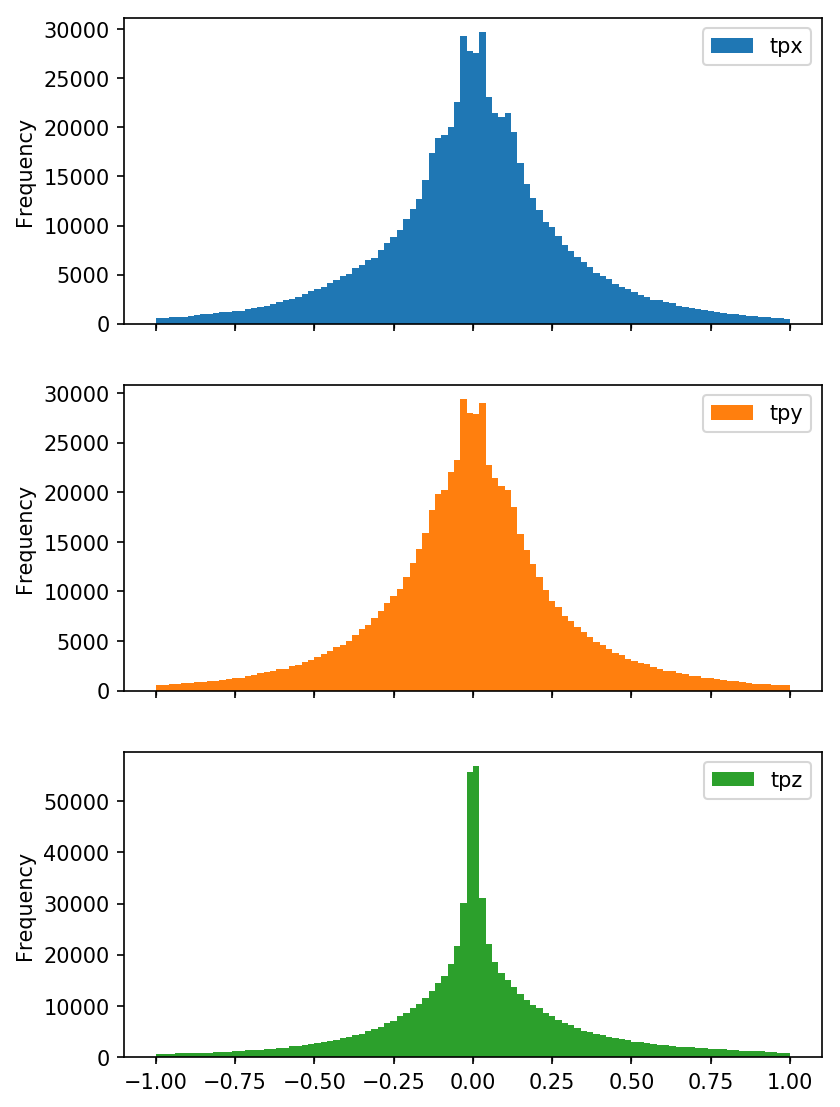

In [10]:
df.plot(kind='hist', bins=np.linspace(-1, 1, 101), subplots=True, figsize=(6, 9));

In [11]:
branches = {
    'timp':   'TrackCovMatrix.mImp',
    'tz':     'TrackCovMatrix.mZ',
    'tpsi':   'TrackCovMatrix.mPsi',
    'tpti':   'TrackCovMatrix.mPti',
    'ttan':   'TrackCovMatrix.mTan',
    'tcurv':  'TrackCovMatrix.mCurv'
}

In [12]:
df = tree.pandas.df(branches.values())
df.columns = user_names(branches)

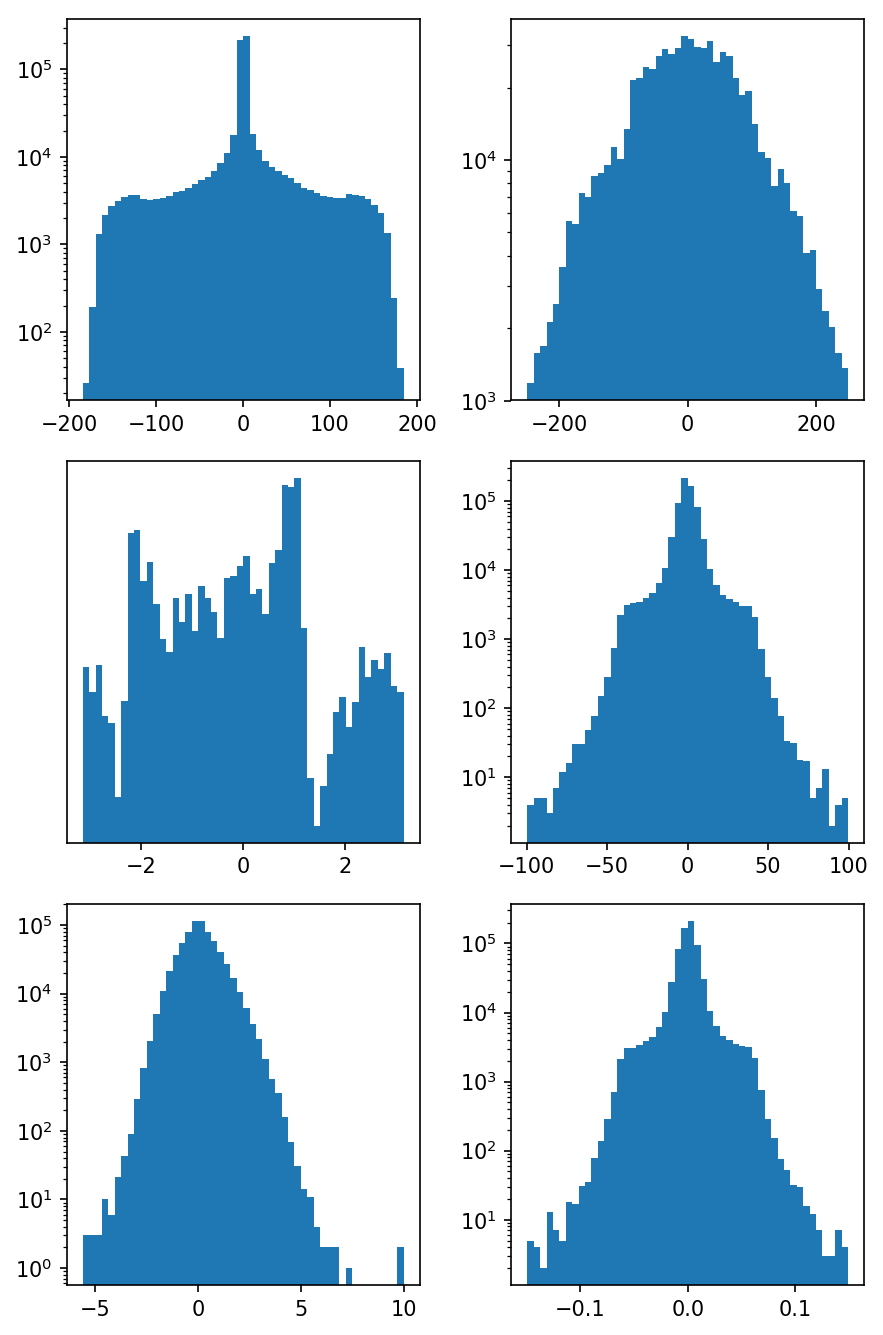

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(6, 9))

for ax, column in zip(axes.flatten(), branches.keys()):
    ax.hist(df[column], bins=50, log=True)
    
plt.tight_layout() 

In [14]:
branches = {
    'vx':     'Event.mPrimaryVertexX',
    'vy':     'Event.mPrimaryVertexY',
    'vz':     'Event.mPrimaryVertexZ',
}

In [15]:
df = tree.pandas.df(branches.values())
df.columns = user_names(branches)

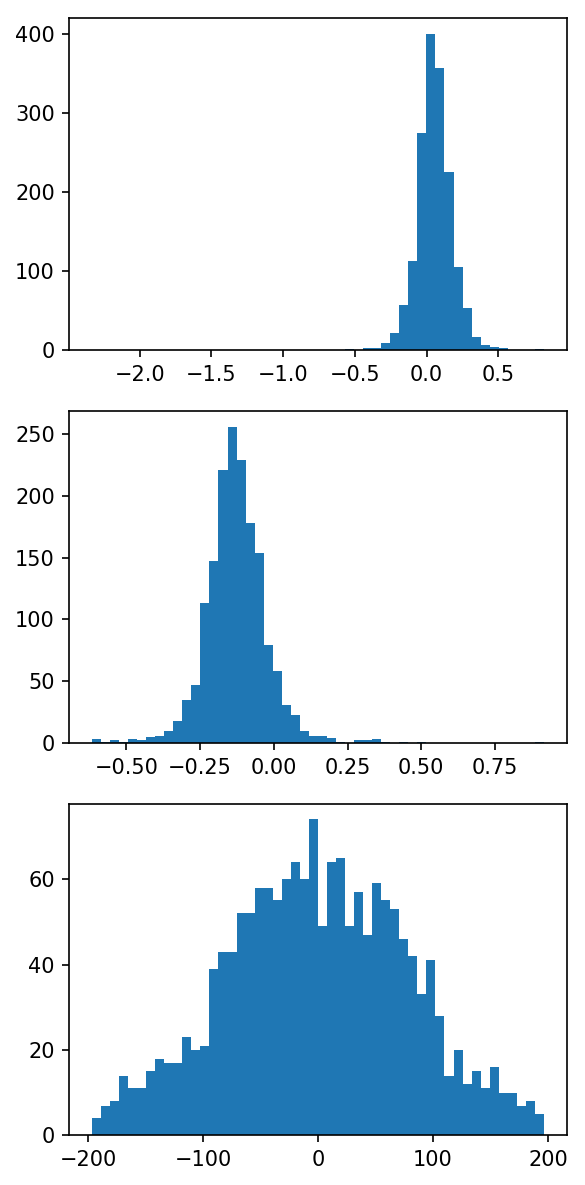

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(4, 8))

for ax, column in zip(axes.flatten(), branches.keys()):
    ax.hist(df[column], bins=50)
    
plt.tight_layout() 